In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset 
credit_df = pd.read_csv('../data/raw/creditcard.csv')

# 1. Cleaning 
print(f"Missing values: {credit_df.isnull().sum().sum()}")
print(f"Duplicates found: {credit_df.duplicated().sum()}")
credit_df.drop_duplicates(inplace=True)

# Basic stats
print(credit_df.describe())

Missing values: 0
Duplicates found: 1081
                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.55

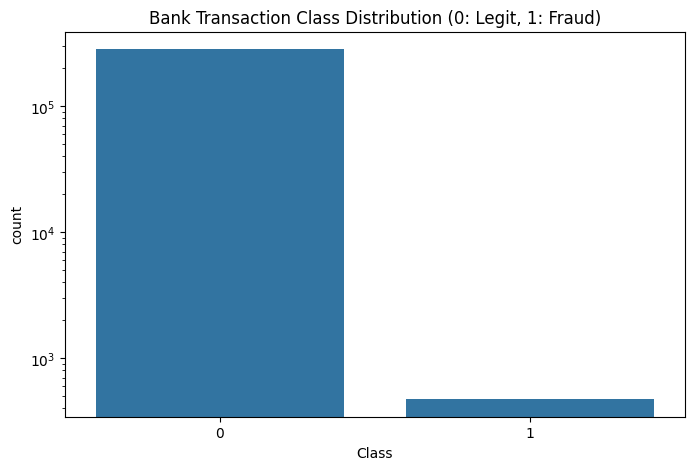

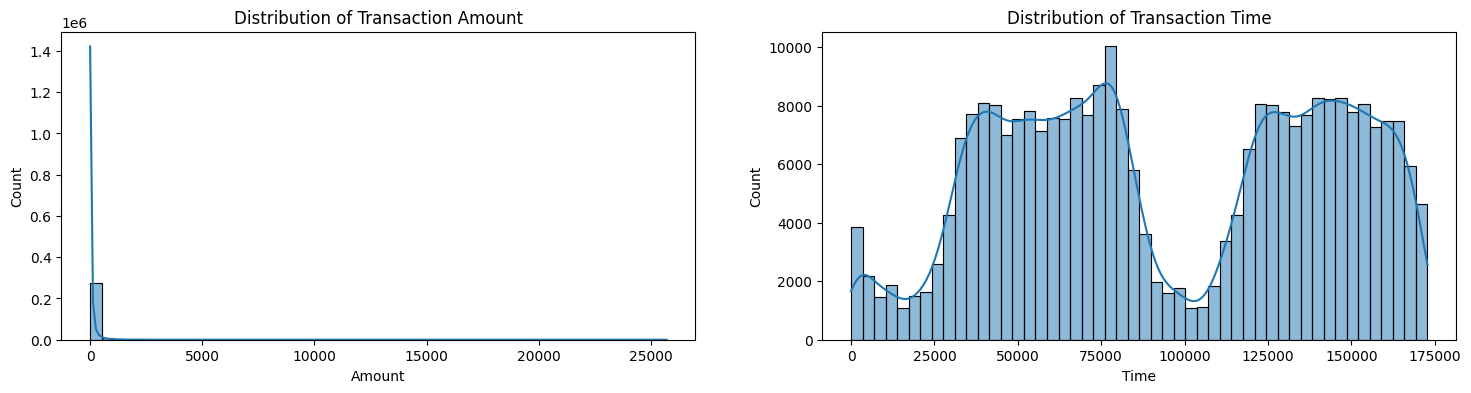

In [2]:
# Visualize Class Imbalance 
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit_df)
plt.title('Bank Transaction Class Distribution (0: Legit, 1: Fraud)')
plt.yscale('log') # Use log scale because imbalance is extreme
plt.show()

# Distribution of Amount and Time 
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(credit_df['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')
sns.histplot(credit_df['Time'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time')
plt.show()

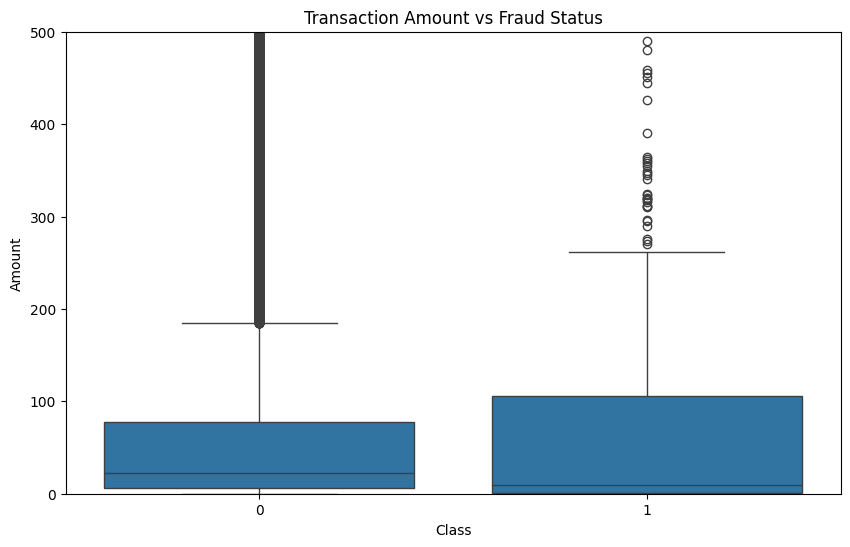

In [3]:
# Compare Amount vs Class 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount vs Fraud Status')
plt.ylim(0, 500) # Zoom in to see the bulk of transactions
plt.show()

# Comparative Analysis: E-commerce vs. Bank Credit Card Fraud

Having completed the Exploratory Data Analysis for both datasets, we can identify key differences that will influence our modeling strategy.

### 1. Data Source and Feature Nature
* **E-commerce (`Fraud_Data.csv`)**: Features are primarily behavioral and demographic (e.g., `age`, `browser`, `source`). Geolocation integration revealed that the **United States** and **Unknown** locations have the highest fraud counts.
* **Bank (`creditcard.csv`)**: Features are anonymized numerical values (V1-V28) derived from PCA. The focus here is on mathematical patterns rather than human-readable attributes like "Country."

### 2. Class Imbalance Comparison
| Dataset | Fraud Percentage | Majority (Legit) | Minority (Fraud) |
| :--- | :--- | :--- | :--- |
| **E-commerce** | **9.36%** | 136,961 | 14,151 |
| **Bank Credit Card** | **0.17%** | 283,253 | 473 |

* **Insight**: The bank dataset has an extremely rare minority class. While SMOTE is effective for the e-commerce data (as seen in our feature engineering documentation where we balanced the training set to a **1:1 ratio**), the bank data may require more specialized resampling or "log-scale" visualization to even see the fraud class distribution.

### 3. Key Fraud Indicators
* **Transaction Amount**: In the Bank dataset, fraudulent transactions often have a lower median value but higher outliers compared to the e-commerce purchase values.
* **Time and Velocity**: For e-commerce, the duration between signup and purchase is a critical indicator. For bank data, we observe cyclic patterns in transaction time that may correlate with fraudulent "bursts."

### 4. Correlation & Leakage Sanity Check
Our **Feature Correlation Heatmap** shows low correlation between the engineered features and the target `class`. This confirms that our features (like `device_freq` and `time_since_signup`) are providing meaningful signal without introducing data leakage.